# Modeling Exercises

1. Select a dataset with a continous target variable.

In [1]:
import wrangle_zillow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_zillow.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [4]:
df.shape

(2152863, 7)

In [5]:
df = remove_outliers(df, 1, df.columns)
df.shape

(951807, 7)

In [6]:
def wrangle_zillow(df):
    df = df.replace(r'^\s*$', np.nan, regex=True)
    df['area'] = df.calculatedfinishedsquarefeet
    df = df.drop(columns='calculatedfinishedsquarefeet')
    df = df.dropna()
    df = df[df.bedroomcnt > 0]
    df = df[df.bedroomcnt < 5]
    df = df[df.bathroomcnt > 0] 
    df = df[df.bathroomcnt <= 3]
    df = df[df.area < 5000]
    df["taxvalue"] = df.taxvaluedollarcnt
    df = df.drop(columns="taxvaluedollarcnt")
    return df

In [7]:
df = wrangle_zillow(df)
df.shape

(949610, 7)

In [8]:
df.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,area,taxvalue
19,3.0,2.0,1950.0,3110.99,6037.0,1300.0,233266.0
20,3.0,2.0,1951.0,3870.25,6037.0,1222.0,290492.0
41,4.0,2.0,1984.0,2559.65,6037.0,2143.0,209415.0
44,4.0,2.0,1971.0,2160.43,6037.0,1604.0,150502.0
770,3.0,2.0,1962.0,4915.66,6037.0,1766.0,390038.0


In [9]:
df.isna().sum()

bedroomcnt     0
bathroomcnt    0
yearbuilt      0
taxamount      0
fips           0
area           0
taxvalue       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949610 entries, 19 to 2152853
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   bedroomcnt   949610 non-null  float64
 1   bathroomcnt  949610 non-null  float64
 2   yearbuilt    949610 non-null  float64
 3   taxamount    949610 non-null  float64
 4   fips         949610 non-null  float64
 5   area         949610 non-null  float64
 6   taxvalue     949610 non-null  float64
dtypes: float64(7)
memory usage: 58.0 MB


In [11]:
df.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,area,taxvalue
19,3.0,2.0,1950.0,3110.99,6037.0,1300.0,233266.0
20,3.0,2.0,1951.0,3870.25,6037.0,1222.0,290492.0
41,4.0,2.0,1984.0,2559.65,6037.0,2143.0,209415.0
44,4.0,2.0,1971.0,2160.43,6037.0,1604.0,150502.0
770,3.0,2.0,1962.0,4915.66,6037.0,1766.0,390038.0


In [12]:
def split(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

In [13]:
train, validate, test = split(df)
train.shape, validate.shape, test.shape

((531781, 7), (227907, 7), (189922, 7))

In [14]:

target = "taxvalue"

# split train into X (dataframe, drop target) & y (series, keep target only)
X_train = train.drop(columns=[target])
y_train = train[target]

# split validate into X (dataframe, drop target) & y (series, keep target only)
X_validate = validate.drop(columns=[target])
y_validate = validate[target]

# split test into X (dataframe, drop target) & y (series, keep target only)
X_test = test.drop(columns=[target])
y_test = test[target]

X_train.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,area
1968540,4.0,2.0,1973.0,7343.40,6059.0,1853.0
19629,4.0,2.5,1978.0,6907.38,6059.0,2370.0
1791940,3.0,2.0,1955.0,4220.64,6037.0,1139.0
2115212,3.0,2.0,1960.0,5212.85,6037.0,1395.0
1870269,3.0,2.0,1955.0,5719.30,6059.0,1322.0


In [15]:
y_test.shape

(189922,)

In [16]:
y_train.head()
len(y_train)

531781

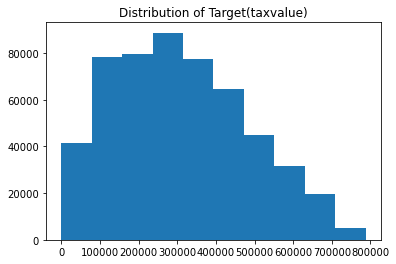

In [17]:
# how do we determine distribution?
plt.hist(y_train)
plt.title('Distribution of Target(taxvalue)')
plt.show()

In [18]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [19]:
# 1. Predict taxvalue_pred_mean
taxvalue_pred_mean = y_train.taxvalue.mean()
y_train['taxvalue_pred_mean'] = taxvalue_pred_mean
y_validate['taxvalue_pred_mean'] = taxvalue_pred_mean

In [20]:
# 2. compute taxvalue_pred_median
taxvalue_pred_median = y_train.taxvalue.median()
y_train['taxvalue_pred_median'] = taxvalue_pred_median
y_validate['taxvalue_pred_median'] = taxvalue_pred_median

In [21]:
# 3. RMSE of taxvalue_pred_mean
rmse_train = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.taxvalue, y_validate.taxvalue_pred_mean) ** (1/2)

In [22]:
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of taxvalue_pred_median
rmse_train = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.taxvalue, y_validate.taxvalue_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  171218.72 
Validate/Out-of-Sample:  171312.28
RMSE using Median
Train/In-Sample:  172053.92 
Validate/Out-of-Sample:  172128.49


In [23]:
from sklearn.metrics import explained_variance_score

In [24]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [25]:
metric_df = pd.DataFrame()
metric_df = make_metric_df(y_train.taxvalue,
                           y_train.taxvalue_pred_median,
                           'median_baseline',
                          metric_df)

In [26]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,172053.923436,0.0


In [27]:
y_train.head()

,taxvalue,taxvalue_pred_mean,taxvalue_pred_median
1968540,720827.0,311343.316687,294411.0
19629,603336.0,311343.316687,294411.0
1791940,308000.0,311343.316687,294411.0
2115212,449241.0,311343.316687,294411.0
1870269,496000.0,311343.316687,294411.0


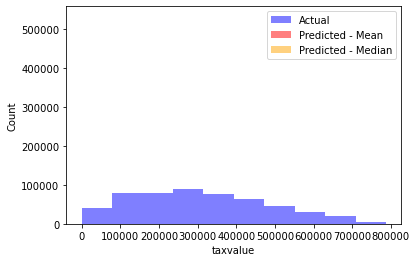

In [28]:
# plot to visualize actual vs predicted. 
plt.hist(y_train.taxvalue, color='blue', alpha=.5, label="Actual")
plt.hist(y_train.taxvalue_pred_mean, bins=1, color='red', alpha=.5, rwidth=1000, label="Predicted - Mean")
plt.hist(y_train.taxvalue_pred_median, bins=1, color='orange', alpha=.5, rwidth=1000, label="Predicted - Median")
plt.xlabel("taxvalue")
plt.ylabel("Count")
plt.legend()
plt.show()

In [29]:
lm = LinearRegression(normalize=True)

lm.fit(X_train, y_train.taxvalue)

y_train['taxvalue_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_lm) ** (1/2)

# predict validate
y_validate['taxvalue_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvalue, y_validate.taxvalue_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  38454.95351374172 
Validation/Out-of-Sample:  38038.274041198194


In [30]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.taxvalue, y_validate.taxvalue_pred_lm)}, ignore_index=True)

In [31]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,172053.923436,0.000000
1,OLS Regressor,38038.274041,0.950698


In [32]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars.fit(X_train, y_train.taxvalue)

# predict train
y_train['taxvalue_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_lars) ** (1/2)

# predict validate
y_validate['taxvalue_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvalue, y_validate.taxvalue_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  38507.3849249711 
Validation/Out-of-Sample:  38090.02005903035


In [33]:
metric_df = make_metric_df(y_validate.taxvalue,
               y_validate.taxvalue_pred_lars,
               'lasso_alpha_1',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,172053.923436,0.000000
1,OLS Regressor,38038.274041,0.950698
2,lasso_alpha_1,38090.020059,0.950564


In [34]:
# create the model object
lars2 = LassoLars(alpha=2)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!
lars2.fit(X_train, y_train.taxvalue)

# predict train
y_train['taxvalue_pred_lars2'] = lars2.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_lars2) ** (1/2)

# predict validate
y_validate['taxvalue_pred_lars2'] = lars2.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvalue, y_validate.taxvalue_pred_lars2) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  38628.95692914353 
Validation/Out-of-Sample:  38211.30768086119


In [35]:
metric_df = make_metric_df(y_validate.taxvalue,
               y_validate.taxvalue_pred_lars2,
               'lasso_alpha_2',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,172053.923436,0.000000
1,OLS Regressor,38038.274041,0.950698
2,lasso_alpha_1,38090.020059,0.950564
3,lasso_alpha_2,38211.307681,0.950249


In [36]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvalue)

# predict train
y_train['taxvalue_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_glm) ** (1/2)

# predict validate
y_validate['taxvalue_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  171218.71749700446 
Validation/Out-of-Sample:  171218.71749700446


In [37]:
metric_df = make_metric_df(y_validate.taxvalue,
               y_validate.taxvalue_pred_glm,
               'TweedieRegressor',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,172053.923436,0.000000
1,OLS Regressor,38038.274041,0.950698
2,lasso_alpha_1,38090.020059,0.950564
3,lasso_alpha_2,38211.307681,0.950249
4,TweedieRegressor,171312.283104,0.000000


3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [38]:
y_test = pd.DataFrame(y_test)
y_test.head()

,taxvalue
286683,263476.0
1901770,543690.0
1354840,660000.0
242185,339503.0
1718556,58768.0


In [39]:
y_test.shape, X_test.shape

((189922, 1), (189922, 6))

In [40]:
X_test.head()

,bedroomcnt,bathroomcnt,yearbuilt,taxamount,fips,area
286683,4.0,2.0,1960.0,6599.46,6037.0,1515.0
1901770,4.0,3.0,1960.0,6262.82,6037.0,1824.0
1354840,3.0,3.0,1979.0,7420.02,6059.0,2373.0
242185,3.0,2.0,1971.0,3946.59,6037.0,1405.0
1718556,3.0,2.0,1955.0,1079.25,6037.0,1061.0


In [42]:
lm = LinearRegression(normalize=True)

lm.fit(X_train, y_train.taxvalue)

y_train['taxvalue_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvalue, y_train.taxvalue_pred_lm) ** (1/2)

# predict validate
y_validate['taxvalue_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvalue, y_validate.taxvalue_pred_lm) ** (1/2)

# predict test
y_test['taxvalue_pred_lm'] = lm.predict(X_test)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.taxvalue, y_test.taxvalue_pred_lm) ** (1/2)


print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
print("\nTest/Out-of-Sample", rmse_test)

RMSE for OLS using LinearRegression
Training/In-Sample:  38454.95351374172 
Validation/Out-of-Sample:  38038.274041198194

Test/Out-of-Sample 38127.60378034213
